<a href="https://colab.research.google.com/github/jennychen0223/Mnist_models/blob/main/Mnist_model_RNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from keras.datasets import mnist
import matplotlib.pyplot as plt


In [2]:
 (train_feature, train_label),(test_feature, test_label) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


Feature特徵轉換

In [3]:
train_feature_vector = train_feature.reshape(len(train_feature), 28, 28).astype('float32')
test_feature_vector = test_feature.reshape(len(test_feature), 28, 28).astype('float32')

In [4]:
print(train_feature_vector.shape, test_feature_vector.shape)

(60000, 28, 28) (10000, 28, 28)


In [5]:
train_feature_normalize = train_feature_vector/255
test_feature_normalize = test_feature_vector/255

print(train_feature_normalize[0])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [6]:
!pip install np_utils
from keras.utils import np_utils


     |████████████████████████████████| 61 kB 2.8 MB/s 
  Created wheel for np-utils: filename=np_utils-0.5.12.1-py3-none-any.whl size=57132 sha256=7f234319b1568414d2473f458456c51afc37138409535a1b974c5bf536c802e0
  Stored in directory: /root/.cache/pip/wheels/8c/4e/ef/095c24693723c329f4cdc1079861cdbb2487d4b41b2496a4e7
Successfully built np-utils


In [7]:
train_label_onehot = np_utils.to_categorical(train_label)
test_label_onehot = np_utils.to_categorical(test_label)

print(train_label_onehot[0:5])

[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


In [8]:
from keras.models import Sequential
from keras.layers import SimpleRNN, Dropout, Dense

In [11]:
model = Sequential()
model.add(SimpleRNN(
    input_shape = (28, 28),
    units = 256,
    unroll = True #計算時展開結構
))

In [12]:
model.add(Dropout(0.1))

In [13]:
model.add(Dense(units = 10,
                kernel_initializer = 'normal',
                activation = 'softmax'))

In [14]:
model.compile(loss = 'categorical_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])

In [15]:
train_history = model.fit(x=train_feature_normalize,
                          y=train_label_onehot,
                          validation_split = 0.2,
                          epochs = 10,
                          batch_size = 200,
                          verbose = 2)

Epoch 1/10
240/240 - 45s - loss: 0.4463 - accuracy: 0.8668 - val_loss: 0.2573 - val_accuracy: 0.9201
Epoch 2/10
240/240 - 16s - loss: 0.2044 - accuracy: 0.9397 - val_loss: 0.1543 - val_accuracy: 0.9541
Epoch 3/10
240/240 - 16s - loss: 0.1561 - accuracy: 0.9540 - val_loss: 0.1329 - val_accuracy: 0.9622
Epoch 4/10
240/240 - 16s - loss: 0.1265 - accuracy: 0.9633 - val_loss: 0.1167 - val_accuracy: 0.9660
Epoch 5/10
240/240 - 16s - loss: 0.1127 - accuracy: 0.9675 - val_loss: 0.1075 - val_accuracy: 0.9682
Epoch 6/10
240/240 - 16s - loss: 0.1038 - accuracy: 0.9703 - val_loss: 0.0948 - val_accuracy: 0.9725
Epoch 7/10
240/240 - 16s - loss: 0.0923 - accuracy: 0.9725 - val_loss: 0.0919 - val_accuracy: 0.9740
Epoch 8/10
240/240 - 16s - loss: 0.0877 - accuracy: 0.9738 - val_loss: 0.0886 - val_accuracy: 0.9741
Epoch 9/10
240/240 - 16s - loss: 0.0771 - accuracy: 0.9774 - val_loss: 0.0991 - val_accuracy: 0.9707
Epoch 10/10
240/240 - 15s - loss: 0.0758 - accuracy: 0.9775 - val_loss: 0.0860 - val_accura

In [16]:
scores = model.evaluate(test_feature_normalize, test_label_onehot)
print('\n 準確率=', scores[1])

313/313 [==============================] - 4s 6ms/step - loss: 0.0881 - accuracy: 0.9744

 準確率= 0.974399983882904


In [17]:
prediction = model.predict_classes(test_feature_normalize)

/usr/local/lib/python3.7/dist-packages/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [18]:
def show_images_labels_predictions(images, labels, predictions, start_id, num=10):
  plt.gcf().set_size_inches(12, 14)
  if num>25: num=25
  for i in range(num):
    ax = plt.subplot(5,5,i+1)
    #顯示黑白圖片
    ax.imshow(images[start_id], cmap = 'binary')

    #有預測結果資料，才顯示結果
    if (len(predictions) > 0):
      title = 'ai = ' + str(predictions[i])
      #預測正確顯示o / 預測正確顯示x
      title += ('(o)' if predictions[i] == labels[i] else '(x)')
      title += '\nlabel = ' + str(labels[i])
    #沒有預測結果，只在標題顯示真實數值
    else:
      title = 'label =' + str(labels[i])
    #x, y軸不顯示刻度
    ax.set_title(title, fontsize=12)
    ax.set_xticks([]); ax.set_yticks([])
    start_id += 1
  plt.show()

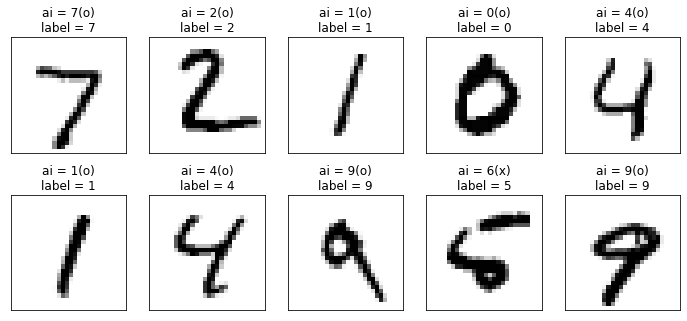

In [19]:
show_images_labels_predictions(test_feature, test_label, prediction, 0)

In [20]:
model.save('Mnist_model_RNN.h5')
print("模型儲存完畢")

模型儲存完畢
